# Objection Detection using YOLO v3

### YOLO v3 (You only look once) model written in TensorFlow

In [1]:
#import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from yolov3 import *
from util import *

from PIL import Image, ImageDraw, ImageFont
from seaborn import color_palette

In [2]:
#From YOLOv3 paper https://pjreddie.com/media/files/papers/YOLOv3.pdf, bounding box priors
#dervived using k-means clustering on COCO dataset
ANCHORS = [(10,13),(16,30),(33,23),(30,61),(62,45),(59,119),(116,90),(156,198),(373,326)]


## Converting Official YOLO v3 weights to Tensorflow format
#### Official YOLO v3 weights trained on COCO dataset

In [3]:
"""
inputs = tf.placeholder(tf.float32, [1, 416, 416, 3])

model = YOLOv3((416,416), 80, ANCHORS, 0.4, 0.5, 20, 'channels_last')
detect_model = model.detect(inputs)

yolovars = tf.global_variables(scope='yolov3')
assign_list = convert_weights(yolovars, './Data/yolov3.weights')

saver = tf.train.Saver(tf.global_variables(scope='yolov3'))

with tf.Session() as sess:
    sess.run(assign_list)
    saver.save(sess, './Data/yolov3.ckpt')
"""

"\ninputs = tf.placeholder(tf.float32, [1, 416, 416, 3])\n\nmodel = YOLOv3((416,416), 80, ANCHORS, 0.4, 0.5, 20, 'channels_last')\ndetect_model = model.detect(inputs)\n\nyolovars = tf.global_variables(scope='yolov3')\nassign_list = convert_weights(yolovars, './Data/yolov3.weights')\n\nsaver = tf.train.Saver(tf.global_variables(scope='yolov3'))\n\nwith tf.Session() as sess:\n    sess.run(assign_list)\n    saver.save(sess, './Data/yolov3.ckpt')\n"

# Sample Detections

In [4]:
inputs = tf.placeholder(tf.float32, [3, 416, 416, 3])

file_list = ['./Data/test.jpg', './Data/test2.jpg', './Data/dog.jpg']
batch = load_image_batch(file_list, (416,416))
classnames = class_names('./Data/coco.names')

model = YOLOv3((416,416), 80, ANCHORS, 0.5, 0.5, 5, 'channels_last')
detect_model = model.detect(inputs)
saver = tf.train.Saver(tf.global_variables(scope='yolov3'))

with tf.Session() as sess:
    #writer = tf.summary.FileWriter('logs', sess.graph)
    saver.restore(sess, './Data/yolov3.ckpt')
    detection_result = sess.run(detect_model, feed_dict={inputs: batch})
    #writer.close()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./Data/yolov3.ckpt


# Output
#### YOLO v3 outputs a prediction tensor of N x N x 3 * (4 + 1 + number of classes) 

in which the last dimension is detection at 3 different scales * (4 box coordinates (box center x, box center y, box width, box height) + 1 confidence score + 80 class prediction scores.

The box coordinates are then to converted box diagonal coordinates for IOU (Intersection over Union) during Non-Max Suppression. Final output is a list of class $\rightarrow$ boxes dictionaries (as shown below)

In [13]:
detection_result

[{0: array([], shape=(0, 5), dtype=float32),
  1: array([], shape=(0, 5), dtype=float32),
  2: array([], shape=(0, 5), dtype=float32),
  3: array([], shape=(0, 5), dtype=float32),
  4: array([], shape=(0, 5), dtype=float32),
  5: array([], shape=(0, 5), dtype=float32),
  6: array([], shape=(0, 5), dtype=float32),
  7: array([], shape=(0, 5), dtype=float32),
  8: array([], shape=(0, 5), dtype=float32),
  9: array([], shape=(0, 5), dtype=float32),
  10: array([], shape=(0, 5), dtype=float32),
  11: array([], shape=(0, 5), dtype=float32),
  12: array([], shape=(0, 5), dtype=float32),
  13: array([], shape=(0, 5), dtype=float32),
  14: array([], shape=(0, 5), dtype=float32),
  15: array([[145.98035  , 157.07027  , 188.33972  , 302.07208  ,   0.9938267],
         [ 92.071594 , 173.83209  , 152.91472  , 300.49078  ,   0.9381537]],
        dtype=float32),
  16: array([[215.8994    , 120.118774  , 309.41858   , 195.23154   ,
            0.9973974 ],
         [ 91.99333   , 175.31963   , 153.46

In [6]:
for i, filename in enumerate(file_list):
    draw_boxes(filename, classnames, detection_result[i], (416,416))

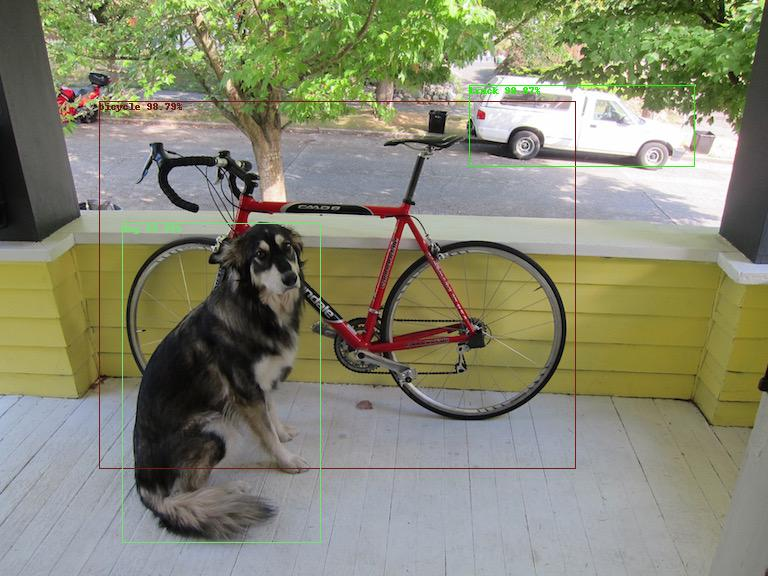

In [9]:
from IPython.display import Image 
Image(filename='./output/detection_dog.jpg')

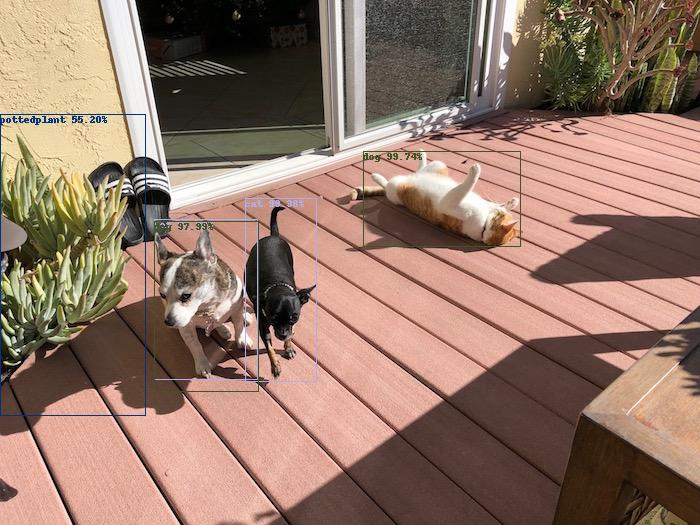

In [10]:
Image(filename='./output/detection_test.jpg')

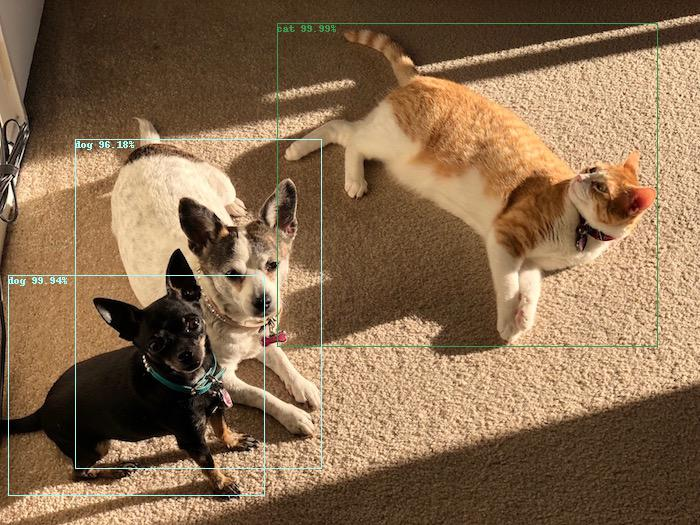

In [11]:
Image(filename='./output/detection_test2.jpg')